In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import random
from numpy.linalg import norm

import time
from google.colab import files
from tools import Kaczmarz_methods, soft_skrinkage

In [2]:
# Fixing random state for reproducibility
np.random.seed(1234)

# Well conditioned Matrix : Toy Example

In [5]:
# Create the toy example

m = 500  # number of equation
n = 784  # number of unknown

lambda_rk = 0
lambda_rsk = 15 # sparsity parameter lambda for our ARBK and BK method

A = np.random.randn(m,n)

# Generating the true solution
u = np.random.randn(m,1)
x_true = soft_skrinkage(A.T @ u, lambda_rsk)

b = A @ x_true
# set tolerance and maximum number of iterations
tol = 1e-6

print(f'Shape of A {A.shape}')
print(f'Shape of the true solution {x_true.shape}')
print(f'Shape of b {b.shape}')
print(f'condition number of A {np.linalg.cond(A)}')
print(f'# nonzeros components of x^*: {n - np.sum(x_true == np.zeros((n,1)))}, percentage : {100 *(n - np.sum(x_true == np.zeros((n,1))))/n} %')

Shape of A (500, 784)
Shape of the true solution (784, 1)
Shape of b (500, 1)
condition number of A 8.982581624492205
# nonzeros components of x^*: 408, percentage : 52.04081632653061 %


# Implementation of differents methods:
  - Randomized Bregman Kaczmarz method (BK)
  - Accelerated Randomized Bregman Kaczmarz method (ARBK)
  - Nesterov Randomized Bregman Kaczmarz method (NRBK)
  - Restarted Accelerated Randomized Bregman Kaczmarz method (RARBK)

In [7]:
max_iter = int(200* max(m,n))

alpha = 1
number_block = int(m/4)
Time_record = dict()

In [8]:
# Fix the block partition
index_list = list([i for i in range(m)])
copy_index_list = index_list.copy()
Partition_lists = np.array_split(copy_index_list, number_block)

In [9]:
#@title : Accelerated Randomized Bregman Kaczmarz method (ARBK)

# Run the Accelerated Randomized Bregman Kaczmarz method (ARBK)
y_start_arbk = np.zeros((m, 1))
method_arbk = 'ARBK'

Funct_values = []
Errors = []
Residuals = []
sparsity_sol = [n - np.sum(soft_skrinkage(A.T @ y_start_arbk, lambda_rsk) == np.zeros((n,1)))]

start = time.time()
y_arbk, Funct_values_arbk, Errors_arbk, Residuals_arbk, sparsity_sol_arbk  = Kaczmarz_methods(A, b, y_start_arbk, x_true, max_iter, lambda_rsk,
                                                                                              number_block, alpha, Funct_values, Errors, Residuals,
                                                                                              sparsity_sol, tol, method_arbk, p_list=Partition_lists)

end = time.time()
Time_record[method_arbk+ f'-{number_block}'] = end - start
print(f'The Randomized Accelerated Bregman Kaczmarz will run for a total of {max_iter} iterations in {end - start} sec. \n')
print(len(Funct_values_arbk))

Method = ARBK : number of blocks = 125, alpha = 1, lambda = 15 for 156800 iterations
The Randomized Accelerated Bregman Kaczmarz will run for a total of 156800 iterations in 22.737056970596313 sec. 

146


In [10]:
#@title : Randomized Bregman Kaczmarz method (BK)

y_start_bk = np.zeros((m, 1))
method_bk = 'BK'
funct_values = []

errors = []
residuals = []
sparsity_sol = [n - np.sum(soft_skrinkage(A.T @ y_start_bk, lambda_rsk) == np.zeros((n,1)))]

start = time.time()
y_bk, Funct_values_bk, Errors_bk, Residuals_bk, sparsity_sol_bk  = Kaczmarz_methods(A, b, y_start_bk, x_true, max_iter, lambda_rsk,
                                                                                              number_block, alpha, funct_values, errors,
                                                                                    residuals, sparsity_sol, tol, method_bk, p_list=Partition_lists)

end = time.time()
Time_record[method_bk + f'-{number_block}'] = end - start
print(f'The Randomized Bregman Kaczmarz will run for a total of {max_iter} iterations in {end - start} sec. \n')
print(len(Funct_values_bk))

Method = BK : number of blocks = 125, alpha = 1, lambda = 15 for 156800 iterations
The Randomized Bregman Kaczmarz will run for a total of 156800 iterations in 44.221813917160034 sec. 

314


In [11]:
#@title : Nesterov Randomized Bregman-Kaczmarz (NRBK)

y_start_nrbk = np.zeros((m, 1))
method_nrbk = 'NRBK'

Errors = []
Funct_values = []
Residuals = []
sparsity_sol = [n - np.sum(soft_skrinkage(A.T @ y_start_nrbk, lambda_rsk) == np.zeros((n,1)))]

start = time.time()
y_nrbk, Funct_values_nrbk, Errors_nrbk, Residuals_nrbk, sparsity_sol_nrbk  = Kaczmarz_methods(A, b, y_start_nrbk, x_true, max_iter, lambda_rsk,
                                                                                              number_block, alpha, Funct_values, Errors, Residuals,
                                                                                              sparsity_sol, tol, method_nrbk, p_list=Partition_lists)

end = time.time()
Time_record[method_nrbk + f'-{number_block}'] = end - start
print(f'The Nesterov Accelerated Coordinate Descent will run for a total of {max_iter} iterations in {end - start} sec. \n')
print(len(Funct_values_nrbk))

Method = NRBK : number of blocks = 125, alpha = 1, lambda = 15 for 156800 iterations
The Nesterov Accelerated Coordinate Descent will run for a total of 156800 iterations in 52.765355825424194 sec. 

314


In [12]:
# differents restarts

K = 165*number_block
Restart_periods = [K for i in range(int(max_iter/(K)))]
Restart_periods.append(max_iter - sum(Restart_periods))
num_restart = len(Restart_periods)


print(f'Repeat after {Restart_periods[0]} iterations, number of restart is {num_restart}, Total number of iterations is {max_iter}')

Repeat after 20625 iterations, number of restart is 8, Total number of iterations is 156800


In [13]:
#@title :  Accelerated Randomized Bregman Kaczmarz method (ARBK) with restart

y_start_rarbk = np.zeros((m, 1))
method_arbk = 'ARBK'

Funct_values = []
Errors = []
Residuals = []
sparsity_sol = [n - np.sum(soft_skrinkage(A.T @ y_start_rarbk, lambda_rsk) == np.zeros((n,1)))]

start = time.time()
for restart in range(num_restart):
  y_rarbk, Funct_values_rarbk, Errors_rarbk, Residuals_rarbk, sparsity_sol_rarbk  = Kaczmarz_methods(A, b, y_start_rarbk, x_true, Restart_periods[restart], lambda_rsk,
                                                                                              number_block, alpha, Funct_values, Errors, Residuals,
                                                                                                     sparsity_sol, tol, method_arbk, p_list=Partition_lists)
  if min(Errors_rarbk[-1],Residuals_rarbk[-1]) <= tol :
    break
  x_k = soft_skrinkage(A.T @ y_rarbk, lambda_rsk)
  x_k_previous = soft_skrinkage(A.T @ y_start_rarbk, lambda_rsk)
  f_v_y = 0.5*(np.linalg.norm(x_k)**2) - b.T @ y_rarbk
  f_v_y_previous = 0.5*(np.linalg.norm(x_k_previous)**2) - b.T @ y_start_rarbk
  # condition to choose the iterate
  if f_v_y <= f_v_y_previous :
    # print('New Iterate choosen')
    y_start_rarbk = y_rarbk
  else:
    # print('Old Iterate choosen')
    y_start_rarbk = y_start_rarbk
  Funct_values, Errors, Residuals, sparsity_sol = Funct_values_rarbk, Errors_rarbk, Residuals_rarbk, sparsity_sol_rarbk

end = time.time()
Time_record['R' + method_arbk + f'-{number_block}'] = end - start
print(f'The Randomized Accelerated Bregman Kaczmarz will run for a total of {max_iter} iterations in {end - start} sec. \n')
print(len(Funct_values_rarbk))

Method = ARBK : number of blocks = 125, alpha = 1, lambda = 15 for 20625 iterations
Method = ARBK : number of blocks = 125, alpha = 1, lambda = 15 for 20625 iterations
The Randomized Accelerated Bregman Kaczmarz will run for a total of 156800 iterations in 23.29562473297119 sec. 

65


In [14]:
Time_record

{'ARBK-125': 22.737056970596313,
 'BK-125': 44.221813917160034,
 'NRBK-125': 52.765355825424194,
 'RARBK-125': 23.29562473297119}

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

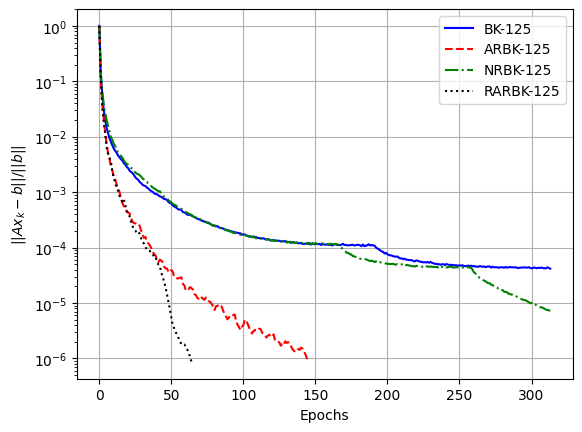

In [26]:
#@title : Residuals plots

plt.grid(True)
# plt.title('Residuals')
plt.semilogy(Residuals_bk, label= 'BK'+ f'-{number_block}', color='blue')
plt.semilogy(Residuals_arbk, linestyle='dashed', label= 'ARBK'+ f'-{number_block}', color='red')
plt.plot(Residuals_nrbk, linestyle='-.',label= 'NRBK'+ f'-{number_block}', color='green')
plt.plot(Residuals_rarbk, linestyle='dotted',label= 'RARBK'+ f'-{number_block}', color='black')
plt.xlabel("Epochs")
plt.ylabel('$||Ax_k - b||/||b||$')
plt.legend()

# name = 'residuals{}_{}.png'.format(m,n)
# plt.savefig(name, format='png', dpi=100, bbox_inches='tight')
# files.download(name)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

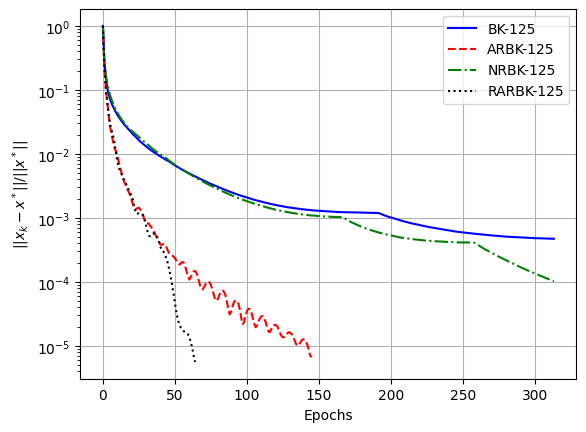

In [27]:
#@title : Errors plots

plt.grid(True)
# plt.title('Errors')
plt.semilogy(Errors_bk, label= 'BK'+ f'-{number_block}', color='blue')
plt.semilogy(Errors_arbk, linestyle='dashed',label= 'ARBK'+ f'-{number_block}', color='red')
plt.semilogy(Errors_nrbk, linestyle='-.',label= 'NRBK'+ f'-{number_block}', color='green')
plt.semilogy(Errors_rarbk, linestyle='dotted',label= 'RARBK'+ f'-{number_block}', color='black')
plt.xlabel("Epochs")
plt.ylabel('$||x_k - x^*||/||x^*||$')
plt.legend()

# name = 'errors{}_{}.png'.format(m,n)
# plt.savefig(name, format='png', dpi=100, bbox_inches='tight')
# files.download(name)
plt.show()

# Variation of the number of Block for the ARBK Method.

In [17]:
# Fixing the partitions for the same number of blocks both for the ARBK and RARBK methods

index_list = list([i for i in range(m)])
copy_index_list = index_list.copy()

Block_Partition_lists = dict()
block_numbers = [m, int(m/2), int(m/4), int(m/10), int(m/100)] # Here we consider different Block size.

for blc_nber in block_numbers:
  Block_Partition_lists[blc_nber] = np.array_split(copy_index_list, blc_nber)

In [18]:
method_arbk = 'ARBK'

Results = dict()

for blc_nber in block_numbers:
  Results[blc_nber] = dict()

for blc_nber in block_numbers:
  y_0 = np.zeros((m, 1))
  Funct_values = []
  Errors = []
  Residuals = []

  sparsity_sol = [n - np.sum(soft_skrinkage(A.T @ y_0, lambda_rsk) == np.zeros((n,1)))]
  start = time.time()
  y_arbk1, Funct_values_arbk1, Errors_arbk1, Residuals_arbk1, sparsity_sol_arbk1  = Kaczmarz_methods(A, b, y_0, x_true, max_iter, lambda_rsk,
                                                                                                     blc_nber, alpha, Funct_values, Errors, Residuals,
                                                                                                     sparsity_sol, tol, method_arbk, p_list=Block_Partition_lists[blc_nber])

  end = time.time()
  Results[blc_nber]['Time'] = end - start
  Results[blc_nber]['error'] = Errors_arbk1
  Results[blc_nber]['residual'] = Residuals_arbk1
  Results[blc_nber]['sparsity'] = sparsity_sol_arbk1

  print(f'The Randomized Accelerated Bregman Kaczmarz run for a total of {max_iter} iterations in {end - start} sec. \n')

Method = ARBK : number of blocks = 500, alpha = 1, lambda = 15 for 156800 iterations
The Randomized Accelerated Bregman Kaczmarz run for a total of 156800 iterations in 64.36928582191467 sec. 

Method = ARBK : number of blocks = 250, alpha = 1, lambda = 15 for 156800 iterations
The Randomized Accelerated Bregman Kaczmarz run for a total of 156800 iterations in 46.01939845085144 sec. 

Method = ARBK : number of blocks = 125, alpha = 1, lambda = 15 for 156800 iterations
The Randomized Accelerated Bregman Kaczmarz run for a total of 156800 iterations in 20.378474235534668 sec. 

Method = ARBK : number of blocks = 50, alpha = 1, lambda = 15 for 156800 iterations
The Randomized Accelerated Bregman Kaczmarz run for a total of 156800 iterations in 9.849184513092041 sec. 

Method = ARBK : number of blocks = 5, alpha = 1, lambda = 15 for 156800 iterations
The Randomized Accelerated Bregman Kaczmarz run for a total of 156800 iterations in 2.3518459796905518 sec. 



In [19]:
for blc_nber in block_numbers:
  print('M = {}, Time = {}'.format(blc_nber, Results[blc_nber]['Time']))

M = 500, Time = 64.36928582191467
M = 250, Time = 46.01939845085144
M = 125, Time = 20.378474235534668
M = 50, Time = 9.849184513092041
M = 5, Time = 2.3518459796905518


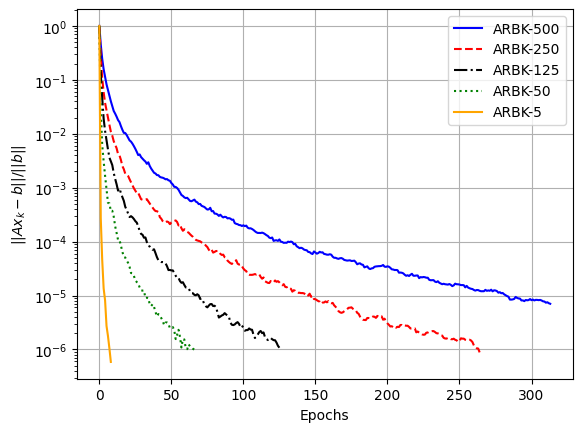

In [20]:
#@title : Residuals plots

linestyles = ['solid','dashed', '-.', 'dotted', 'solid','dashed', '-.']
colors = ['blue', 'red', 'black', 'green', 'orange']

plt.grid(True)
# plt.title('Residuals')
for k in range(len(block_numbers)):
  plt.semilogy(Results[block_numbers[k]]['residual'], linestyle=linestyles[k], label= 'ARBK' + f'-{block_numbers[k]}', color=colors[k])

plt.xlabel("Epochs")
plt.ylabel('$||Ax_k - b||/||b||$')
plt.legend()

# name = 'residuals_blocks{}_{}.png'.format(m,n)
# plt.savefig(name, format='png', dpi=100, bbox_inches='tight')
# files.download(name)
plt.show()

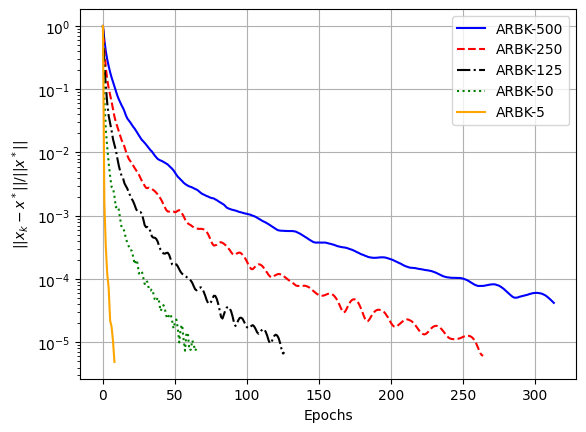

In [21]:
#@title : Errors plots

linestyles = ['solid','dashed', '-.', 'dotted', 'solid','dashed', '-.']
colors = ['blue', 'red', 'black', 'green', 'orange']

plt.grid(True)
# plt.title('Errors')
for k in range(len(block_numbers)):
  plt.semilogy(Results[block_numbers[k]]['error'], linestyle=linestyles[k], label= 'ARBK' + f'-{block_numbers[k]}', color=colors[k])

plt.xlabel("Epochs")
plt.ylabel('$||x_k - x^*||/||x^*||$')
plt.legend()

# name = 'errors_blocks{}_{}.png'.format(m,n)
# plt.savefig(name, format='png', dpi=100, bbox_inches='tight')
# files.download(name)
plt.show()

# Variation of the number of Block for the Restart-ARBK Method.

In [22]:
method_arbk = 'ARBK'

Results_rarbk = dict()

for blc_nber in block_numbers:
  Results_rarbk[blc_nber] = dict()

for blc_nber in block_numbers:
  y_start_rarbk = np.zeros((m, 1))
  Funct_values = []
  Errors = []
  Residuals = []

  ####################################################################
  K = 200*blc_nber #20*m # 200M = 20m
  Restart_periods = [K for i in range(int(max_iter/(K)))]
  Restart_periods.append(max_iter - sum(Restart_periods))
  num_restart = len(Restart_periods)

  print(f'number of blocks : {blc_nber}, Repeat after {Restart_periods[0]} iterations, number of restart is {num_restart}, Total number of iterations is {max_iter}')
  ####################################################################

  sparsity_sol = [n - np.sum(soft_skrinkage(A.T @ y_start_rarbk, lambda_rsk) == np.zeros((n,1)))]
  start = time.time()
  ####################################################################
  for restart in range(num_restart):
    y_rarbk1, Funct_values_rarbk1, Errors_rarbk1, Residuals_rarbk1, sparsity_sol_rarbk1  = Kaczmarz_methods(A, b, y_start_rarbk, x_true, Restart_periods[restart], lambda_rsk,
                                                                                                blc_nber, alpha, Funct_values, Errors, Residuals,
                                                                                                            sparsity_sol, tol, method_arbk, p_list=Block_Partition_lists[blc_nber])
    if min(Errors_rarbk1[-1],Residuals_rarbk1[-1]) <= tol :
      break
    x_k = soft_skrinkage(A.T @ y_rarbk, lambda_rsk)
    x_k_previous = soft_skrinkage(A.T @ y_start_rarbk, lambda_rsk)
    f_v_y = 0.5*(np.linalg.norm(x_k)**2) - b.T @ y_rarbk
    f_v_y_previous = 0.5*(np.linalg.norm(x_k_previous)**2) - b.T @ y_start_rarbk
    # condition to choose the iterate
    if f_v_y <= f_v_y_previous :
      # print('New Iterate choosen')
      y_start_rarbk = y_rarbk
    else:
      # print('Old Iterate choosen')
      y_start_rarbk = y_start_rarbk
    Funct_values, Errors, Residuals, sparsity_sol = Funct_values_rarbk1, Errors_rarbk1, Residuals_rarbk1, sparsity_sol_rarbk1
  ####################################################################

  end = time.time()
  Results_rarbk[blc_nber]['Time'] = end - start
  Results_rarbk[blc_nber]['error'] = Errors_rarbk1
  Results_rarbk[blc_nber]['residual'] = Residuals_rarbk1
  Results_rarbk[blc_nber]['sparsity'] = sparsity_sol_rarbk1

  print(f'The Restarted Randomized Accelerated Bregman Kaczmarz run for a total of {max_iter} iterations in {end - start} sec. \n')

number of blocks : 500, Repeat after 100000 iterations, number of restart is 2, Total number of iterations is 156800
Method = ARBK : number of blocks = 500, alpha = 1, lambda = 15 for 100000 iterations
Method = ARBK : number of blocks = 500, alpha = 1, lambda = 15 for 56800 iterations
The Restarted Randomized Accelerated Bregman Kaczmarz run for a total of 156800 iterations in 46.89017653465271 sec. 

number of blocks : 250, Repeat after 50000 iterations, number of restart is 4, Total number of iterations is 156800
Method = ARBK : number of blocks = 250, alpha = 1, lambda = 15 for 50000 iterations
Method = ARBK : number of blocks = 250, alpha = 1, lambda = 15 for 50000 iterations
The Restarted Randomized Accelerated Bregman Kaczmarz run for a total of 156800 iterations in 18.573774576187134 sec. 

number of blocks : 125, Repeat after 25000 iterations, number of restart is 7, Total number of iterations is 156800
Method = ARBK : number of blocks = 125, alpha = 1, lambda = 15 for 25000 it

In [23]:
print('For restarted version')
for blc_nber in block_numbers:
  print('M = {}, Time = {}'.format(blc_nber, Results_rarbk[blc_nber]['Time']))

For restarted version
M = 500, Time = 46.89017653465271
M = 250, Time = 18.573774576187134
M = 125, Time = 7.190083265304565
M = 50, Time = 4.418872356414795
M = 5, Time = 0.4982881546020508


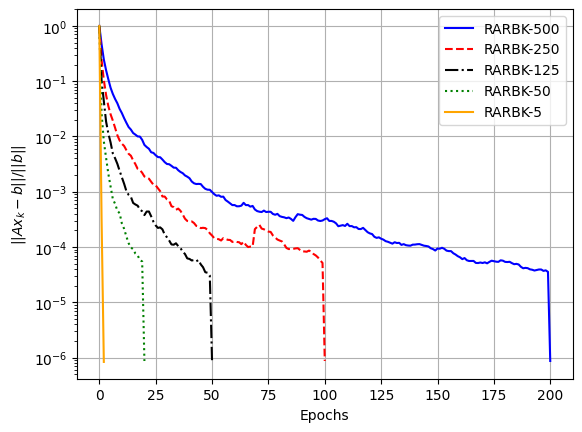

In [24]:
#@title : Residuals plots

linestyles = ['solid','dashed', '-.', 'dotted', 'solid','dashed', '-.']
colors = ['blue', 'red', 'black', 'green', 'orange']

plt.grid(True)
# plt.title('Residuals')
for k in range(len(block_numbers)):
  plt.semilogy(Results_rarbk[block_numbers[k]]['residual'], linestyle=linestyles[k], label= 'RARBK' + f'-{block_numbers[k]}', color=colors[k])

plt.xlabel("Epochs")
plt.ylabel('$||Ax_k - b||/||b||$')
plt.legend()

# name = 'residuals_blocks_rarbk{}_{}.png'.format(m,n)
# plt.savefig(name, format='png', dpi=100, bbox_inches='tight')
# files.download(name)
plt.show()

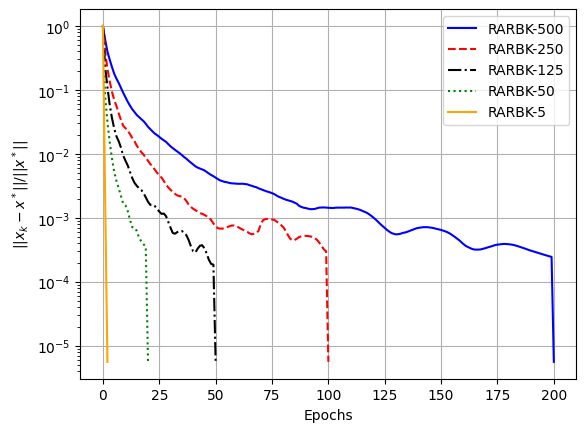

In [25]:
#@title : Errors plots

linestyles = ['solid','dashed', '-.', 'dotted', 'solid','dashed', '-.']
colors = ['blue', 'red', 'black', 'green', 'orange']

plt.grid(True)
# plt.title('Errors')
for k in range(len(block_numbers)):
  plt.semilogy(Results_rarbk[block_numbers[k]]['error'], linestyle=linestyles[k], label= 'RARBK' + f'-{block_numbers[k]}', color=colors[k])

plt.xlabel("Epochs")
plt.ylabel('$||x_k - x^*||/||x^*||$')
plt.legend()

# name = 'errors_blocks_rarbk{}_{}.png'.format(m,n)
# plt.savefig(name, format='png', dpi=100, bbox_inches='tight')
# files.download(name)
plt.show()